<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *Daniel Barzilai*

----

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [1]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: /content/ITL-SI10-2024-P1-dataset.csv
100% 7.03k/7.03k [00:00<00:00, 13.0MB/s]


In [37]:
# Importação das bibliotecas
import pandas as pd

# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
print(df.head())

         Data  Visitantes Únicos  Sessões  Taxa de Rejeição (%)  \
0  2023-01-01              113.0    126.0             50.496714   
1  2023-01-02               90.0    157.0             49.438007   
2  2023-01-03               92.0    185.0             49.800231   
3  2023-01-04              130.0    206.0             50.251843   
4  2023-01-05              123.0    155.0             48.070931   

   Páginas por Sessão Principais Origens do Tráfego Dispositivos  Eventos  \
0            1.834201                        Direto      Desktop        8   
1            1.955760                        Social      Desktop        5   
2            2.285052                        Direto      Desktop        9   
3            2.325464                          Pago       Mobile        6   
4            2.267006                        Direto      Desktop        6   

   Taxa de Conversão (%)  Tempo Médio de Sessão (minutos)  
0               1.952083                         5.395516  
1             

In [6]:
print(df.columns)

Index(['Data', 'Visitantes Únicos', 'Sessões', 'Taxa de Rejeição (%)',
       'Páginas por Sessão', 'Principais Origens do Tráfego', 'Dispositivos',
       'Eventos', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)'],
      dtype='object')


## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

In [21]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

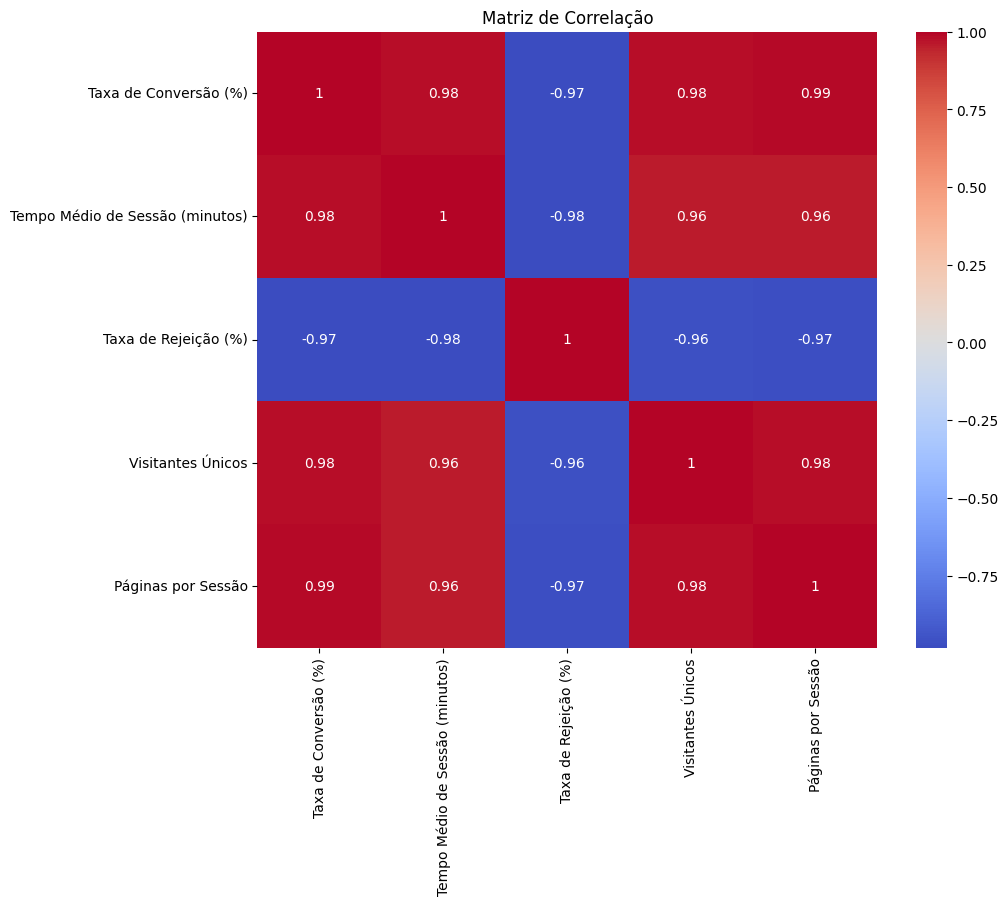

In [22]:
# Matriz de correlação
matriz_correlacao = df[['Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)', 'Taxa de Rejeição (%)', 'Visitantes Únicos', 'Páginas por Sessão']].corr()

# Plotando matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [23]:
# Gráficos interativos
fig = px.scatter(df, x='Tempo Médio de Sessão (minutos)', y='Taxa de Conversão (%)', color='Taxa de Rejeição (%)', hover_data=['Visitantes Únicos', 'Páginas por Sessão'])
fig.show()

### Questão 2

**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

In [25]:
#Importação de biblioteca
import numpy as np

In [30]:
# Definição da distribuição de probabilidade da taxa de conversão
conversao_media = 0.2  # média
conversao_dp = 0.03  # desvio padrão

# Número de simulações de Monte Carlo
num_simulacoes = 10000

# Gerando amostras aleatórias para a taxa de conversão
conversao_amostras = np.random.normal(conversao_media, conversao_dp, num_simulacoes)

# Calculo de métricas de interesse para cada amostra
conversao_media = np.mean(conversao_amostras) # media
conversao_ic = np.percentile(conversao_amostras, [2.5, 97.5]) # intervalo de confiança

# Exibição dos resultados
print(f"Taxa de Conversão Média: {conversao_media:.2%}")
print(f"Intervalo de Confiança (95%): {conversao_ic[0]:.2%} - {conversao_ic[1]:.2%}")

Taxa de Conversão Média: 20.01%
Intervalo de Confiança (95%): 14.22% - 25.89%


In [33]:


# Definição da distribuição de probabilidade para o tempo médio de sessão e taxa de rejeição
tempo_sessao_media = 5.2  # média do tempo médio
tempo_sessao_dp = 1.2  # desvio padrão do tempo médio

taxa_rejeicao_media = 0.35  # média
taxa_rejeicao_dp = 0.05  # desvio padrão

# Número de simulações de Monte Carlo
num_simulacoes = 10000

# Gerando amostras aleatórias para o tempo médio de sessão
tempo_sessao_amostras = np.random.normal(tempo_sessao_media, tempo_sessao_dp, num_simulacoes)

# Gerando amostras aleatórias para a taxa de rejeição
taxa_rejeicao_amostras = np.random.normal(taxa_rejeicao_media, taxa_rejeicao_dp, num_simulacoes)

# Calculo de métricas de interesse para cada amostra
tempo_sessao_media = np.mean(tempo_sessao_amostras)# média
tempo_sessao_ic = np.percentile(tempo_sessao_amostras, [2.5, 97.5]) # intervalo de confiança

taxa_rejeicao_media = np.mean(taxa_rejeicao_amostras)
taxa_rejeicao_ic = np.percentile(taxa_rejeicao_amostras, [2.5, 97.5])

# Exibição dos resultados
print(f"Tempo Médio de Sessão Médio: {tempo_sessao_media:.2f} minutos")
print(f"Intervalo de Confiança (95%) para o Tempo Médio de Sessão: {tempo_sessao_ic[0]:.2f} - {tempo_sessao_ic[1]:.2f} minutos")

print(f"Taxa de Rejeição Média: {taxa_rejeicao_media:.2%}")
print(f"Intervalo de Confiança (95%) para a Taxa de Rejeição: {taxa_rejeicao_ic[0]:.2%} - {taxa_rejeicao_ic[1]:.2%}")

Tempo Médio de Sessão Médio: 5.19 minutos
Intervalo de Confiança (95%) para o Tempo Médio de Sessão: 2.85 - 7.52 minutos
Taxa de Rejeição Média: 35.01%
Intervalo de Confiança (95%) para a Taxa de Rejeição: 25.28% - 44.71%


### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

In [38]:
# Importação das bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:

from sklearn.linear_model import LinearRegression



# Defina as variáveis de entrada e a variável alvo
X = df[['Tempo Médio de Sessão (minutos)', 'Visitantes Únicos', 'Taxa de Rejeição (%)']]
y = df['Taxa de Conversão (%)']

# Número de simulações de Monte Carlo
num_simulacoes = 10000

# Crie uma matriz para armazenar os resultados das simulações
resultados_simulacoes = np.zeros((num_simulacoes, len(X.columns)))

# Crie um modelo de regressão linear
model = LinearRegression()

# Realize a simulação de Monte Carlo
for i in range(num_simulacoes):
    # Gere variações aleatórias para cada variável de entrada
    fatores_aleatorios = np.random.normal(loc=1, scale=0.1, size=len(X.columns))
    Simulacao_X = X.values * fatores_aleatorios

    # Treina o modelo com os dados simulados
    model.fit(Simulacao_X, y)

    # Armazenea os coeficientes de regressão do modelo
    resultados_simulacoes[i] = model.coef_

# Calcula as médias e desvios-padrão dos coeficientes de regressão
media = resultados_simulacoes.mean(axis=0)
dp = resultados_simulacoes.std(axis=0)

# Exibição dos resultados
for i, feature in enumerate(X.columns):
    print("Analise de sensibildade: ", feature)
    print("Media:", media[i])
    print("Desvio padrão:", dp[i])
    print("------------------------")

Analise de sensibildade  Tempo Médio de Sessão (minutos)
Media: 0.12356674219236743
Desvio padrão: 0.012841329781101982
------------------------
Analise de sensibildade  Visitantes Únicos
Media: 0.00692376570492332
Desvio padrão: 0.0007151901279137226
------------------------
Analise de sensibildade  Taxa de Rejeição (%)
Media: -0.024214963515448704
Desvio padrão: 0.0025168650002111315
------------------------


## Entrega

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.